Importing libraries and setting directories...
Loading results from all models...
✓ All results loaded successfully!

📊 FUSION METHODS COMPARISON
                 Model  Test_MAE   Test_R2
            Audio-LSTM  9.971088 -1.774362
             Text-BERT  2.555677 -1.076480
          Early Fusion  9.944358 -1.770545
     Late Fusion (Avg) 10.156029 -1.837923
Late Fusion (Weighted)  6.418528 -0.201409

🏆 BEST MODEL: Text-BERT
   Test MAE: 2.5557


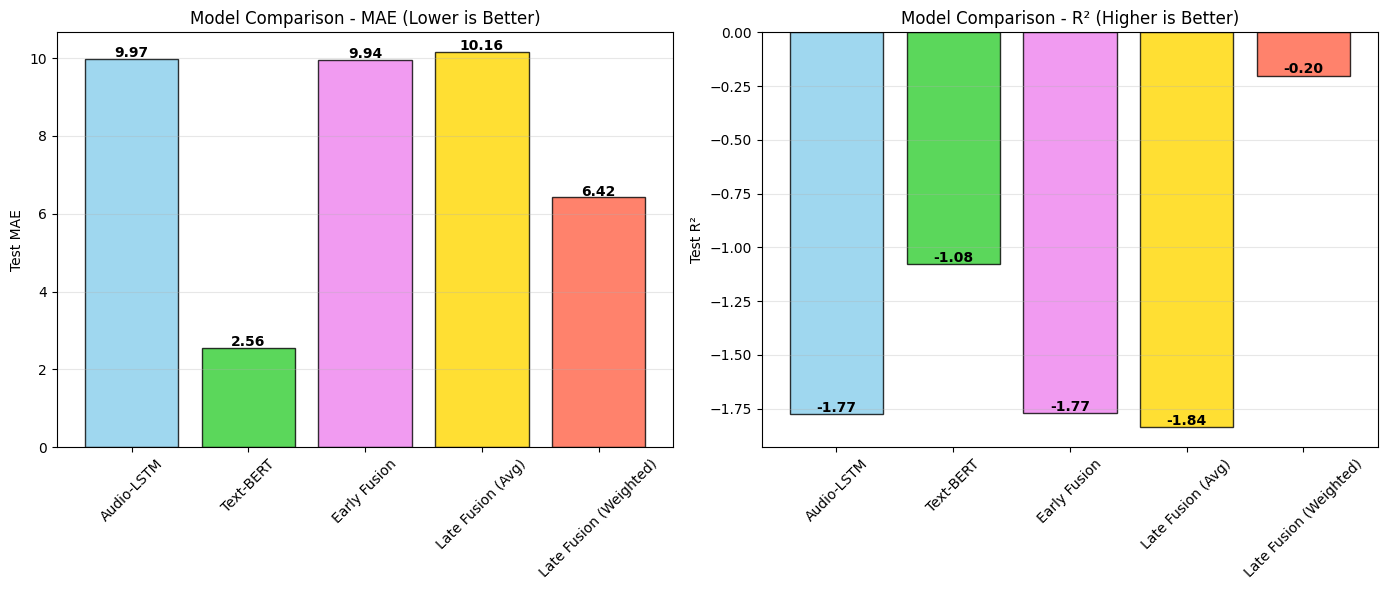


✓ Comparison complete and visualization saved!


In [3]:
# ========== CELL 1: Import Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set results directory
RESULTS_DIR = Path(r"C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\results")
print("Importing libraries and setting directories...")

# ========== CELL 2: Load Result CSVs ==========
def load_results_safe(file_path):
    """Loads a CSV and standardizes column names to lowercase."""
    df = pd.read_csv(file_path)
    df.columns = [c.strip().lower() for c in df.columns]
    return df

print("Loading results from all models...")

audio_df = load_results_safe(RESULTS_DIR / "metrics" / "audio_lstm_results.csv")
text_df = load_results_safe(RESULTS_DIR / "metrics" / "text_bert_results.csv")
early_df = load_results_safe(RESULTS_DIR / "metrics" / "early_fusion_results.csv")
late_df = load_results_safe(RESULTS_DIR / "metrics" / "late_fusion_results.csv")

print("✓ All results loaded successfully!")

# ========== CELL 3: Verify and Normalize Column Names ==========
def get_metric(df, col_candidates):
    """Try multiple possible column names until found."""
    for c in col_candidates:
        if c in df.columns:
            return df[c].values[0]
    raise KeyError(f"None of {col_candidates} found in {df.columns.tolist()}")

# Handle late fusion having multiple rows (for avg & weighted)
late_simple = late_df[late_df["method"].str.contains("simple", case=False, na=False)]
late_weighted = late_df[late_df["method"].str.contains("weight", case=False, na=False)]

# ========== CELL 4: Build Comparison Table ==========
comparison = pd.DataFrame({
    "Model": [
        "Audio-LSTM",
        "Text-BERT",
        "Early Fusion",
        "Late Fusion (Avg)",
        "Late Fusion (Weighted)"
    ],
    "Test_MAE": [
        get_metric(audio_df, ["test_mae", "mae", "test mae"]),
        get_metric(text_df, ["test_mae", "mae", "test mae"]),
        get_metric(early_df, ["test_mae", "mae", "test mae"]),
        get_metric(late_simple, ["test_mae", "mae", "test mae"]),
        get_metric(late_weighted, ["test_mae", "mae", "test mae"])
    ],
    "Test_R2": [
        get_metric(audio_df, ["test_r2", "r2", "test r2"]),
        get_metric(text_df, ["test_r2", "r2", "test r2"]),
        get_metric(early_df, ["test_r2", "r2", "test r2"]),
        get_metric(late_simple, ["test_r2", "r2", "test r2"]),
        get_metric(late_weighted, ["test_r2", "r2", "test r2"])
    ]
})

print("\n" + "=" * 70)
print("📊 FUSION METHODS COMPARISON")
print("=" * 70)
print(comparison.to_string(index=False))

# ========== CELL 5: Best Model ==========
best_idx = comparison["Test_MAE"].idxmin()
print(f"\n🏆 BEST MODEL: {comparison.loc[best_idx, 'Model']}")
print(f"   Test MAE: {comparison.loc[best_idx, 'Test_MAE']:.4f}")

# ========== CELL 6: Visualization ==========
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = ["skyblue", "limegreen", "violet", "gold", "tomato"]

# Bar chart for MAE
axes[0].bar(comparison["Model"], comparison["Test_MAE"], color=colors, alpha=0.8, edgecolor="black")
axes[0].set_ylabel("Test MAE")
axes[0].set_title("Model Comparison - MAE (Lower is Better)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(alpha=0.3, axis="y")
for i, v in enumerate(comparison["Test_MAE"]):
    axes[0].text(i, v + 0.05, f"{v:.2f}", ha="center", fontweight="bold")

# Bar chart for R²
axes[1].bar(comparison["Model"], comparison["Test_R2"], color=colors, alpha=0.8, edgecolor="black")
axes[1].set_ylabel("Test R²")
axes[1].set_title("Model Comparison - R² (Higher is Better)")
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid(alpha=0.3, axis="y")
for i, v in enumerate(comparison["Test_R2"]):
    axes[1].text(i, v + 0.01, f"{v:.2f}", ha="center", fontweight="bold")

plt.tight_layout()
(RESULTS_DIR / "figures").mkdir(parents=True, exist_ok=True)
plt.savefig(RESULTS_DIR / "figures" / "fusion_comparison_final.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n✓ Comparison complete and visualization saved!")
print("=" * 70)
